## Duplicates

In [21]:
import pandas as pd
import numpy as np

simple = pd.DataFrame([1,2,2],['A','B','C'])
simple


,0
A,1
B,2
C,2


In [22]:
simple.duplicated()

A    False
B    False
C     True
dtype: bool

In [23]:
simple.drop_duplicates()

,0
A,1
B,2


# Missing Data

在 Pandas 中，為了表示缺失值，引入了一個新的值 pd.NA（單例）。之前，Pandas 使用多個值來表示缺失數

據：對於浮點數據使用 np.nan，對於對象類型數據使用 np.nan 或 None，對於類似日期時間的數據使用

pd.NaT。pd.NA 的目標是提供一個可以在不同數據類型之間一致使用的“缺失”指標。目前，pd.NA 被應用於可空

的整數和布爾數據類型以及新的字符串數據類型。

In [24]:
import pandas as pd
import numpy as np


In [25]:
print(type(np.nan))

<class 'float'>


In [26]:
print(np.nan)

nan


In [27]:
pd.NA

<NA>

In [28]:
print(type(pd.NA))

<class 'pandas._libs.missing.NAType'>


In [29]:
np.nan == np.nan

False

In [30]:
np.nan is np.nan

True

In [31]:
np.nan in [np.nan]

True

In [32]:
pd.NA == pd.NA

<NA>

In [33]:
pd.NA is pd.NA

True

In [34]:
pd.NA in [pd.NA]

True

In [35]:
import pandas as pd
df = pd.read_csv("movie_scores.csv")
df.head()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [36]:
df.isnull()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [37]:
df.notnull()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,True,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [38]:
df[df["first_name"].notnull()]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [39]:
df[(df["pre_movie_score"].isnull()) & (df["sex"].notnull()) ]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
2,Hugh,Jackman,51.0,m,NaN,NaN


## Drop Data

In [40]:
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [41]:
df.dropna()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [46]:
df.dropna(thresh=1)

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [48]:
df.dropna(axis=1,thresh=4)

,first_name,last_name,age,sex
0,Tom,Hanks,63.0,m
1,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m
3,Oprah,Winfrey,66.0,f
4,Emma,Stone,31.0,f


## Fill Data

In [49]:
df.fillna("Missing")

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,Missing,Missing,Missing,Missing,Missing,Missing
2,Hugh,Jackman,51.0,m,Missing,Missing
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [50]:
df["first_name"].fillna("Empty")

0      Tom
1    Empty
2     Hugh
3    Oprah
4     Emma
Name: first_name, dtype: object

In [54]:
print(df["pre_movie_score"].mean())
df["pre_movie_score"].fillna(df["pre_movie_score"].mean())

7.0


0    8.0
1    7.0
2    7.0
3    6.0
4    7.0
Name: pre_movie_score, dtype: float64

In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv("mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data


mpg 通常代表 "miles per gallon"，這是一個測量汽車燃油效率的指標，意指每加侖汽油可以行駛的英里數。

這個指標幫助消費者理解汽車在標準條件下的燃油經濟性。高的 mpg 值表示汽車更加節能，因為它可以在消耗較少的燃料的情況下行駛更長的距離。這是評估汽車性能的一個重要指標，尤其在考慮環保和經濟性時更是如此。
其他欄位如 cylinders（氣缸數）、
displacement（排氣量）

、horsepower（馬力）、weight（重量）、

acceleration（加速度）、

model_year（型號年份）、

origin（產地）和 

name（車型名稱），

In [58]:
g = df.groupby("model_year")
print(g)
print(list(g))

[(70,      mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0        130    3504          12.0   
1   15.0          8         350.0        165    3693          11.5   
2   18.0          8         318.0        150    3436          11.0   
3   16.0          8         304.0        150    3433          12.0   
4   17.0          8         302.0        140    3449          10.5   
5   15.0          8         429.0        198    4341          10.0   
6   14.0          8         454.0        220    4354           9.0   
7   14.0          8         440.0        215    4312           8.5   
8   14.0          8         455.0        225    4425          10.0   
9   15.0          8         390.0        190    3850           8.5   
10  15.0          8         383.0        170    3563          10.0   
11  14.0          8         340.0        160    3609           8.0   
12  15.0          8         400.0        150    3761           9.5   
13  14.0      

#### Adding an aggregate method call. To use a grouped object, you need to tell pandas how you want to aggregate the data.

Common Options:

    mean(): Compute mean of groups
    sum(): Compute sum of group values
    size(): Compute group sizes
    count(): Compute count of group
    std(): Standard deviation of groups
    var(): Compute variance of groups
    sem(): Standard error of the mean of groups
    describe(): Generates descriptive statistics
    first(): Compute first of group values
    last(): Compute last of group values
    nth() : Take nth value, or a subset if n is a list
    min(): Compute min of group values
    max(): Compute max of group values
    
Full List at the Online Documentation: https://pandas.pydata.org/docs/reference/groupby.html

In [60]:
g = df.groupby("model_year")
meanG = g.mean(numeric_only=True)
meanG

,mpg,cylinders,displacement,weight,acceleration,origin
model_year,,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,2861.805556,15.805556,1.611111


In [61]:
meanG["mpg"]

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [62]:
meanG.describe()

,mpg,cylinders,displacement,weight,acceleration,origin
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,23.659059,5.433688,192.106073,2960.466485,15.589128,1.579195
std,5.308042,0.761233,47.662157,325.173903,1.051988,0.260025
min,17.100000,4.137931,115.827586,2436.655172,12.948276,1.275862
25%,20.266667,5.259259,171.740741,2861.805556,15.142857,1.428571
50%,22.703704,5.571429,197.794118,2997.357143,15.813793,1.535714
75%,25.093103,5.821429,209.750000,3176.800000,16.203704,1.645161
max,33.696552,6.758621,281.413793,3419.025000,16.934483,2.206897


In [63]:
meanG.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,13.0,23.659059,5.308042,17.100000,20.266667,22.703704,25.093103,33.696552
cylinders,13.0,5.433688,0.761233,4.137931,5.259259,5.571429,5.821429,6.758621
displacement,13.0,192.106073,47.662157,115.827586,171.740741,197.794118,209.750000,281.413793
weight,13.0,2960.466485,325.173903,2436.655172,2861.805556,2997.357143,3176.800000,3419.025000
acceleration,13.0,15.589128,1.051988,12.948276,15.142857,15.813793,16.203704,16.934483
origin,13.0,1.579195,0.260025,1.275862,1.428571,1.535714,1.645161,2.206897


## Groupby Multiple Columns

In [64]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [66]:
mcgroup = df.groupby(["model_year","cylinders"])
print(list(mcgroup))

[((70, 4),      mpg  cylinders  displacement horsepower  weight  acceleration  \
14  24.0          4         113.0         95    2372          15.0   
18  27.0          4          97.0         88    2130          14.5   
19  26.0          4          97.0         46    1835          20.5   
20  25.0          4         110.0         87    2672          17.5   
21  24.0          4         107.0         90    2430          14.5   
22  25.0          4         104.0         95    2375          17.5   
23  26.0          4         121.0        113    2234          12.5   

    model_year  origin                          name  
14          70       3         toyota corona mark ii  
18          70       3                  datsun pl510  
19          70       2  volkswagen 1131 deluxe sedan  
20          70       2                   peugeot 504  
21          70       2                   audi 100 ls  
22          70       2                      saab 99e  
23          70       2                     

In [68]:
mcmean = mcgroup.mean(numeric_only=True)
mcmean

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

In [69]:
mcmean.index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

In [70]:
mcmean.head(10)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000

In [71]:
mcmean.loc[70]

,mpg,displacement,weight,acceleration,origin
cylinders,,,,,
4,25.285714,107.000000,2292.571429,16.000000,2.285714
6,20.500000,199.000000,2710.500000,15.500000,1.000000
8,14.111111,367.555556,3940.055556,11.194444,1.000000


In [72]:
mcmean.loc[[70,72]]

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000

In [73]:
mcmean.loc[(70, 6)]

mpg               20.5
displacement     199.0
weight          2710.5
acceleration      15.5
origin             1.0
Name: (70, 6), dtype: float64

## 用來根據索引（index）選取特定的行或列。
### key=70：選取索引值為 70 的資料。
### axis=0：從 行索引（row index） 選取資料。
### level="model_year"：如果 g 是一個 MultiIndex DataFrame，則 70 是 model_year 這個層級的索引值。


In [76]:
mcmean.xs(key=70,axis=0,level="model_year")

,mpg,displacement,weight,acceleration,origin
cylinders,,,,,
4,25.285714,107.000000,2292.571429,16.000000,2.285714
6,20.500000,199.000000,2710.500000,15.500000,1.000000
8,14.111111,367.555556,3940.055556,11.194444,1.000000


In [80]:
mcmean.xs(key=4,axis=0,level="cylinders" )

,mpg,displacement,weight,acceleration,origin
model_year,,,,,
70,25.285714,107.000000,2292.571429,16.000000,2.285714
71,27.461538,101.846154,2056.384615,16.961538,1.923077
72,23.428571,111.535714,2382.642857,17.214286,1.928571
73,22.727273,109.272727,2338.090909,17.136364,2.000000
74,27.800000,96.533333,2151.466667,16.400000,2.200000
75,25.250000,114.833333,2489.250000,15.833333,2.166667
76,26.766667,106.333333,2306.600000,16.866667,1.866667
77,29.107143,106.500000,2205.071429,16.064286,1.857143
78,29.576471,112.117647,2296.764706,16.282353,2.117647


In [81]:
import pandas as pd
data_one = {'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']}
data_two = {'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}
one = pd.DataFrame(data_one)
two = pd.DataFrame(data_two)


In [82]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [83]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [ ]:
axis0 = pd.concat([one,two],axis=0)
axis0

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


In [86]:
axis1 = pd.concat([one,two],axis=1)
axis1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [88]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [89]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [90]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [91]:
pd.merge(registrations,logins,on="name")

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


In [92]:
pd.merge(registrations,logins,on="name",how="left")

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


In [93]:
pd.merge(registrations,logins,on="name",how="right")

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


In [94]:
pd.merge(registrations,logins,on="name",how="outer")

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


# Pivot Tables(樞紐分析表)


樞紐分析數據有時能幫助澄清關係和連接。

有關各種相關樞紐方法的完整文檔： https://pandas.pydata.org/docs/user_guide/reshaping.html

In [95]:
import pandas as pd
df = pd.read_csv("Sales_Funnel_CRM.csv")
df.head()

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won


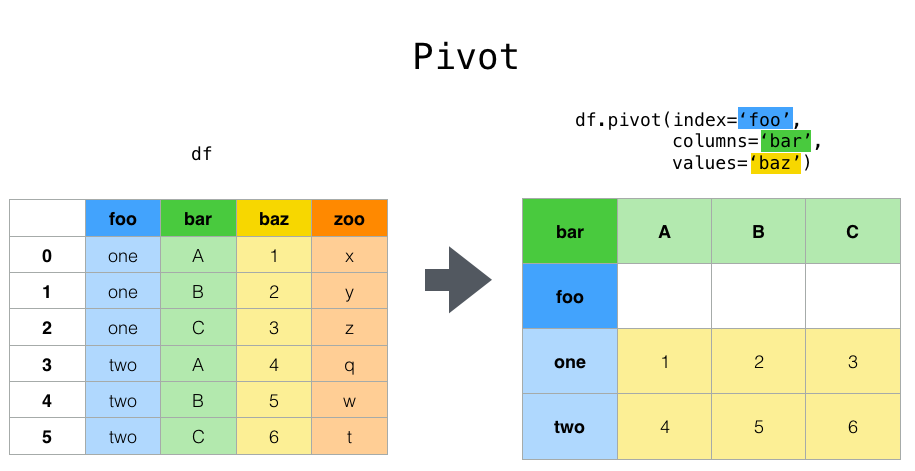

In [97]:
license = df[["Company","Product","Licenses"]]
license

,Company,Product,Licenses
0,Google,Analytics,150
1,Google,Prediction,150
2,Google,Tracking,300
3,BOBO,Analytics,150
4,IKEA,Analytics,300
5,Tesla Inc.,Analytics,300
6,Tesla Inc.,Prediction,150
7,Microsoft,Tracking,300
8,Walmart,Analytics,150
9,Apple,Analytics,300


In [98]:
pd.pivot(data=license,index="Company",columns="Product",values="Licenses")

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


In [99]:
myData = pd.pivot_table(df,index="Company",aggfunc="sum")
myData

,Account Manager,Account Number,Contact,Licenses,Product,Sale Price,Status
Company,,,,,,,
Google,Edward ThorpEdward ThorpEdward Thorp,6370194,Larry PagerLarry PagerLarry Pager,600,AnalyticsPredictionTracking,3150000,PresentedPresentedUnder Review
ATT,Claude ShannonClaude Shannon,1396064,Cindy PhonerCindy Phoner,300,TrackingPrediction,1050000,Under ReviewPresented
Apple,Claude Shannon,405886,Cindy Phoner,300,Analytics,4550000,Won
BOBO,Edward Thorp,2192650,Larry Pager,150,Analytics,2450000,Lost
CVS Health,Claude Shannon,902797,Emma Gordian,450,Tracking,490000,Won
Cisco,Claude ShannonClaude Shannon,4338998,Emma GordianEmma Gordian,600,AnalyticsGPS Positioning,4900000,LostPresented
Exxon Mobile,Claude Shannon,470248,Cindy Phoner,150,Analytics,2100000,Presented
IKEA,Edward Thorp,420496,Elon Tusk,300,Analytics,4550000,Won
Microsoft,Edward Thorp,1216870,Will Grates,300,Tracking,350000,Under Review


In [104]:
myData[["Licenses","Sale Price"]]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [105]:
pd.pivot_table(df,index="Company",aggfunc="sum",values=["Licenses","Sale Price"])

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [106]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Licenses","Sale Price"],aggfunc="sum")

Licenses  Sale Price
Account Manager Contact                           
Claude Shannon  Cindy Phoner       750     7700000
                Emma Gordian      1800    12390000
Edward Thorp    Elon Tusk          750     8050000
                Larry Pager        750     5600000
                Will Grates        450     2800000

In [109]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Licenses","Sale Price"],columns=["Product"],aggfunc="sum")

Licenses                                      \
Product                      Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner     450.0             NaN      150.0    150.0   
                Emma Gordian    1050.0           300.0        NaN    450.0   
Edward Thorp    Elon Tusk        600.0             NaN      150.0      NaN   
                Larry Pager      300.0             NaN      150.0    300.0   
                Will Grates      150.0             NaN        NaN    300.0   

                              Sale Price                                       
Product                        Analytics GPS Positioning Prediction  Tracking  
Account Manager Contact                                                        
Claude Shannon  Cindy Phoner   6650000.0             NaN   700000.0  350000.0  
                Emma Gordian  11550000.0        350000.0        NaN  490000.0  
Edward Thorp    Elon Tusk      7350000.0             NaN   700000.0       NaN  
                Larry Pager    4550000.0             NaN   700000.0  350000.0  
                Will Grates    2450000.0             NaN        NaN  350000.0

In [111]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Licenses","Sale Price"],columns=["Product"],aggfunc="sum",fill_value=0)

Licenses                                      \
Product                      Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner       450               0        150      150   
                Emma Gordian      1050             300          0      450   
Edward Thorp    Elon Tusk          600               0        150        0   
                Larry Pager        300               0        150      300   
                Will Grates        150               0          0      300   

                             Sale Price                                      
Product                       Analytics GPS Positioning Prediction Tracking  
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner    6650000               0     700000   350000  
                Emma Gordian   11550000          350000          0   490000  
Edward Thorp    Elon Tusk       7350000               0     700000        0  
                Larry Pager     4550000               0     700000   350000  
                Will Grates     2450000               0          0   350000

| 變數                     | 類型       | 描述                                                                 | 來源/工程                  |
|------------------------|----------|--------------------------------------------------------------------|--------------------------|
| ADR (平均每日房價)          | 數字型       | 根據參考文獻[5]定義的平均每日房價                                                   | BO, BL 和 TR / 通過除以住宿總夜數來計算所有住宿交易的總和 |
| Adults (成人)              | 整數型       | 成人數目                                                                | BO 和 BL                |
| Agent (代理商)            | 類別型       | 進行預訂的旅行社ID                                                      | BO 和 BL                |
| ArrivalDateDayOfMonth (到達日期日) | 整數型       | 到達日期的日子                                                          | BO 和 BL                |
| ArrivalDateMonth (到達日期月份) | 類別型       | 到達日期的月份，有12個類別：從「一月」到「十二月」                                | BO 和 BL                |
| ArrivalDateWeekNumber (到達日期周數) | 整數型       | 到達日期的周數                                                          | BO 和 BL                |
| ArrivalDateYear (到達日期年份)  | 整數型       | 到達日期的年份                                                          | BO 和 BL                |
| AssignedRoomType (指派房型)   | 類別型       | 預訂分配到的房型代碼。有時候指派的房型會因為酒店運營原因（例如超預訂）或客戶要求而與預留房型不同 | BO 和 BL                |
| Babies (嬰兒)              | 整數型       | 嬰兒數目                                                                | BO 和 BL                |
| BookingChanges (預訂變更次數)  | 整數型       | 從預訂輸入PMS系統到客人入住或取消之間，對預訂所做的更改/修改次數                        | BO 和 BL / 通過加總所有改變預訂屬性的唯一迭代次數 |
| Children (兒童)            | 整數型       | 兒童數目                                                                | BO 和 BL / 包含應付和免費的兒童總數 |
| Company (公司)             | 類別型       | 進行預訂或負責支付預訂的公司/實體ID                                        | BO 和 BL                |
| Country (國家)             | 類別型       | 來源國家。類別以ISO 3155–3:2013格式呈現                                  | BO, BL 和 NT            |
| CustomerType (客戶類型)      | 類別型       | 預訂的類型，假設有四個類別：                                             | BO 和 BL                |
|                          |          | - 合約（Contract）：預訂有配額或其他類型的合約關聯                                        |                          |
|                          |          | - 團體（Group）：預訂與一個團體相關                                                  |                          |
|                          |          | - 瞬間（Transient）：預訂不屬於團體或合約的一部分，也沒有與其他瞬間預訂相關聯                    |                          |
|                          |          | - 瞬間派對（Transient-party）：預訂是瞬間的，但與至少一個其他瞬間預訂相關聯                          |                          |
| DaysInWaitingList (等候名單天數)  | 整數型       | 預訂在確認給客戶前在等候名單上的天數                                         | BO / 通過從預訂確認日期減去進入PMS的日期來計算 |
| DepositType (押金類型)        | 類別型       | 客戶為保證預訂是否支付了押金，此變數可以假設三個類別：                           | BO 和 TR                |
|                          |          | - 無押金（No Deposit） – 未支付押金                                              |                          |
|                          |          | - 非退款（Non Refund – 不可退款）：支付了相當於或超過住宿總費用的押金                      |                          |
|                          |          | - 可退款（Refundable – 可退款）：支付了低於住宿總費用的押金                          |                          |
| DistributionChannel (分銷渠道) | 類別型       | 預訂的分銷渠道。 “TA”代表“旅行社”，“TO”代表“旅行操作者”                      | BO, BL 和 DC            |
| IsCanceled (是否取消)         | 類別型       | 指示預訂是否被取消（1）或未取消（0）                                       | BO                      |
| IsRepeatedGuest (是否回頭客)  | 類別型       | 指示預訂名稱是否來自一個回頭客（1）或不是（0）                                | BO, BL 和 C             |
| LeadTime (領先時間)           | 整數型       | 預訂進入PMS和到達日期之間經過的天數                                          | BO 和 BL                |
| MarketSegment (市場細分)       | 類別型       | 市場細分的指定。類別中，“TA”代表“旅行社”，“TO”代表“旅行操作者”                | BO, BL 和 MS            |
| Meal (餐飲)                  | 類別型       | 預訂的餐飲類型。類別以標準酒店餐飲套餐呈現：                                    | BO, BL 和 ML            |
|                          |          | - 未定義/SC（Undefined/SC） – 沒有餐飲套餐                                    |                          |
|                          |          | - BB（Bed & Breakfast – 僅早餐）                                                |                          |
|                          |          | - HB（Half board – 半食宿）（早餐和另一餐，通常是晚餐）                            |                          |
|                          |          | - FB（Full board – 全食宿）（早餐、午餐和晚餐）                                  |                          |
| PreviousBookingsNotCanceled (之前未取消的預訂數) | 整數型       | 客戶在當前預訂前未取消的先前預訂數                                            | BO 和 BL                |
| PreviousCancellations (之前取消的預訂數) | 整數型       | 客戶在當前預訂前取消的先前預訂數                                              | BO 和 BL                |
| RequiredCardParkingSpaces (所需停車位數) | 整數型       | 客戶所需的車位數                                                          | BO 和 BL                |
| ReservationStatus (預訂狀態)     | 類別型       | 預訂的最後狀態，假設三個類別： | BO                      |
|                          |          | - 已取消（Canceled）：預訂被客戶取消                                                    |                          |
|                          |          | - 已退房（Check-Out）：客戶已入住但已離開                                                  |                          |
|                          |          | - 未到（No-Show）：客戶未入住且未通知酒店原因                                        |                          |
| ReservationStatusDate (預訂狀態日期)  | 日期型       | 設定最後狀態的日期。這個變數可以與「預訂狀態」一起使用，了解預訂何時被取消或客戶何時退房     | BO                      |
| ReservedRoomType (預留房型)    | 類別型       | 預留的房型代碼。代碼出於匿名原因而非具體指定                                    | BO 和 BL                |
| StaysInWeekendNights (週末夜數) | 整數型       | 客人在酒店逗留的週末夜數（星期六或星期日）                                    | BO 和 BL / 通過計算總夜數中的週末夜數 |
| StaysInWeekNights (工作日夜數)  | 整數型       | 客人在酒店逗留的工作日夜數（星期一至星期五）                                  | BO 和 BL / 通過計算總夜數中的工作日夜數 |
| TotalOfSpecialRequests (特別請求總數)  | 整數型       | 客戶提出的特別請求數量（例如雙床或高樓層）                                    | BO 和 BL / 所有特別請求的總和 |


## 載入hotel_booking_data.csv
## 並列出前五筆資料

In [114]:
import pandas as pd
hotels = pd.read_csv("hotel_booking_data.csv")
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [115]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [116]:
## hotels 長度多少
len(hotels)

119390

## 有多少遺失值

In [119]:
hotels.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 作業移除company欄位